In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("C:\\Users\\username\\Documents\\ML Project\\mbenz\\train.csv")
test = pd.read_csv("C:\\Users\\username\\Documents\\ML Project\\mbenz\\test.csv")

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Distribution of target variable')

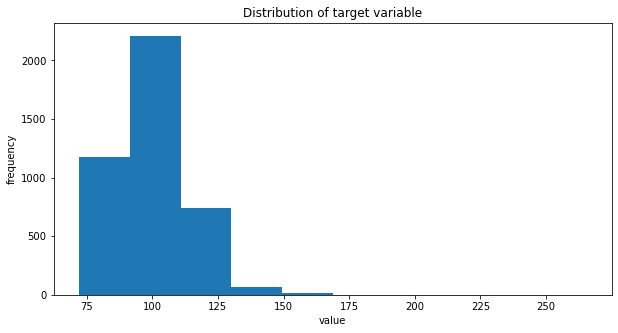

In [5]:
plt.figure(figsize=(10,5))
plt.hist(train['y'])
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Distribution of target variable')

In [6]:
train_cols = train.columns
train_cols_num = train._get_numeric_data().columns
cat_cols = list(set(train_cols) - set(train_cols_num))
cat_cols

['X0', 'X4', 'X3', 'X8', 'X5', 'X1', 'X2', 'X6']

In [7]:
uniq_vals = {}
for col in cat_cols:
    uniq_vals[col] = len(train[col].unique())
cat_cols

['X0', 'X4', 'X3', 'X8', 'X5', 'X1', 'X2', 'X6']

In [8]:
train_desc = train.describe()

min(train_desc.loc['min',:])

0.0

In [10]:
train.isna().any().sum()

0

In [11]:
test.isna().any().sum()

0

In [9]:
train.shape , test.shape

((4209, 378), (4209, 377))

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [14]:
# Separating y column as this is for pediction output
y_train = train['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [15]:
# 376 features with X
colums_x = [c for c in train.columns if 'X' in c]
# colums_x
print(len(colums_x))
print(train[colums_x].dtypes.value_counts())

376
int64     368
object      8
dtype: int64


In [16]:
# Removing unwanted columns (ID); y has been removed earlier
final_column = list(set(train.columns) - set(['ID', 'y']))

x_train = train[final_column]
# x_train
x_test = test[final_column]
# x_test

In [17]:

# Removal of columns with a variance of 0
# Column with a variance of 1 is irrelevant so we drop it

for column in final_column:
    check = len(np.unique(x_train[column]))
    if check == 1:
        x_train.drop(column, axis = 1) 
        x_test.drop(column, axis = 1)
    if check > 2: # Column is categorical; hence mapping to ordinal measure of value
        mapit = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapit)
        x_test[column] = x_test[column].apply(mapit)

x_train.head()

<ipython-input-17-5c9054a05e2d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column] = x_train[column].apply(mapit)
<ipython-input-17-5c9054a05e2d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[column] = x_test[column].apply(mapit)


,X267,X314,X259,X362,X278,X166,X129,X170,X261,X69,...,X38,X248,X325,X49,X279,X207,X161,X233,X87,X283
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
# Performing dimensionality reduction with principal components analysis
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components = n_comp, random_state = 42)
pca_result_train = pca.fit_transform(x_train)
pca_result_test = pca.transform(x_test)

print(pca_result_train)
print(pca_result_test)

[[-49.08156207  -4.90948084 -17.25085325 ...   1.65803879   0.93304053
    1.6784591 ]
 [-48.94680383  -7.22674339 -13.7631947  ...  -0.21433789   0.1091273
    0.44948421]
 [ 92.62761708  31.9940341  -26.17503456 ...  -0.6219359    2.92594579
   -0.52750979]
 ...
 [ 89.47970814  20.44554421  48.11999819 ...  -1.27196734  -0.28709424
    2.00793848]
 [ 96.97110845  31.50977186  49.20059282 ...   0.14367542  -0.98003321
    0.99191062]
 [-17.21024322 -14.22166025  55.38091289 ...  -0.2890524   -0.31640936
    0.69131586]]
[[ 9.22615149e+01  3.29260839e+01 -3.01130736e+01 ... -4.11417130e-01
   3.62101624e+00 -1.20768632e+00]
 [-3.48622379e+01  6.87132606e+00 -3.74760829e+01 ...  6.09267989e-01
  -6.95819034e-01 -4.24899589e-01]
 [ 4.36560426e+01 -5.05939489e+01 -6.10591086e+01 ... -3.20460365e-01
   2.60149281e+00 -1.53761433e+00]
 ...
 [-2.52437784e+01 -2.63794193e+01  5.40742341e+01 ...  6.03527927e-01
   2.61486658e-02  3.67289525e-02]
 [ 4.53823778e+01 -6.38062446e+01  3.58666036e+0

In [25]:
def limits(k):
    upper_limit = k.mean() + 2*k.std()
    lower_limit = k.mean() - 2*k.std()
    std = k.std()
    return (lower_limit,upper_limit)

outlier_indices = []
mask = (train['y'] < limits(train['y'])[0]) | (train['y'] > limits(train['y'])[1])
outlier_indices.extend(train['y'][mask].index.values)
train_cleaned = train.drop(train.index[list(set(outlier_indices))])
train_cleaned

#outliers checks

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='X8', ylabel='y'>

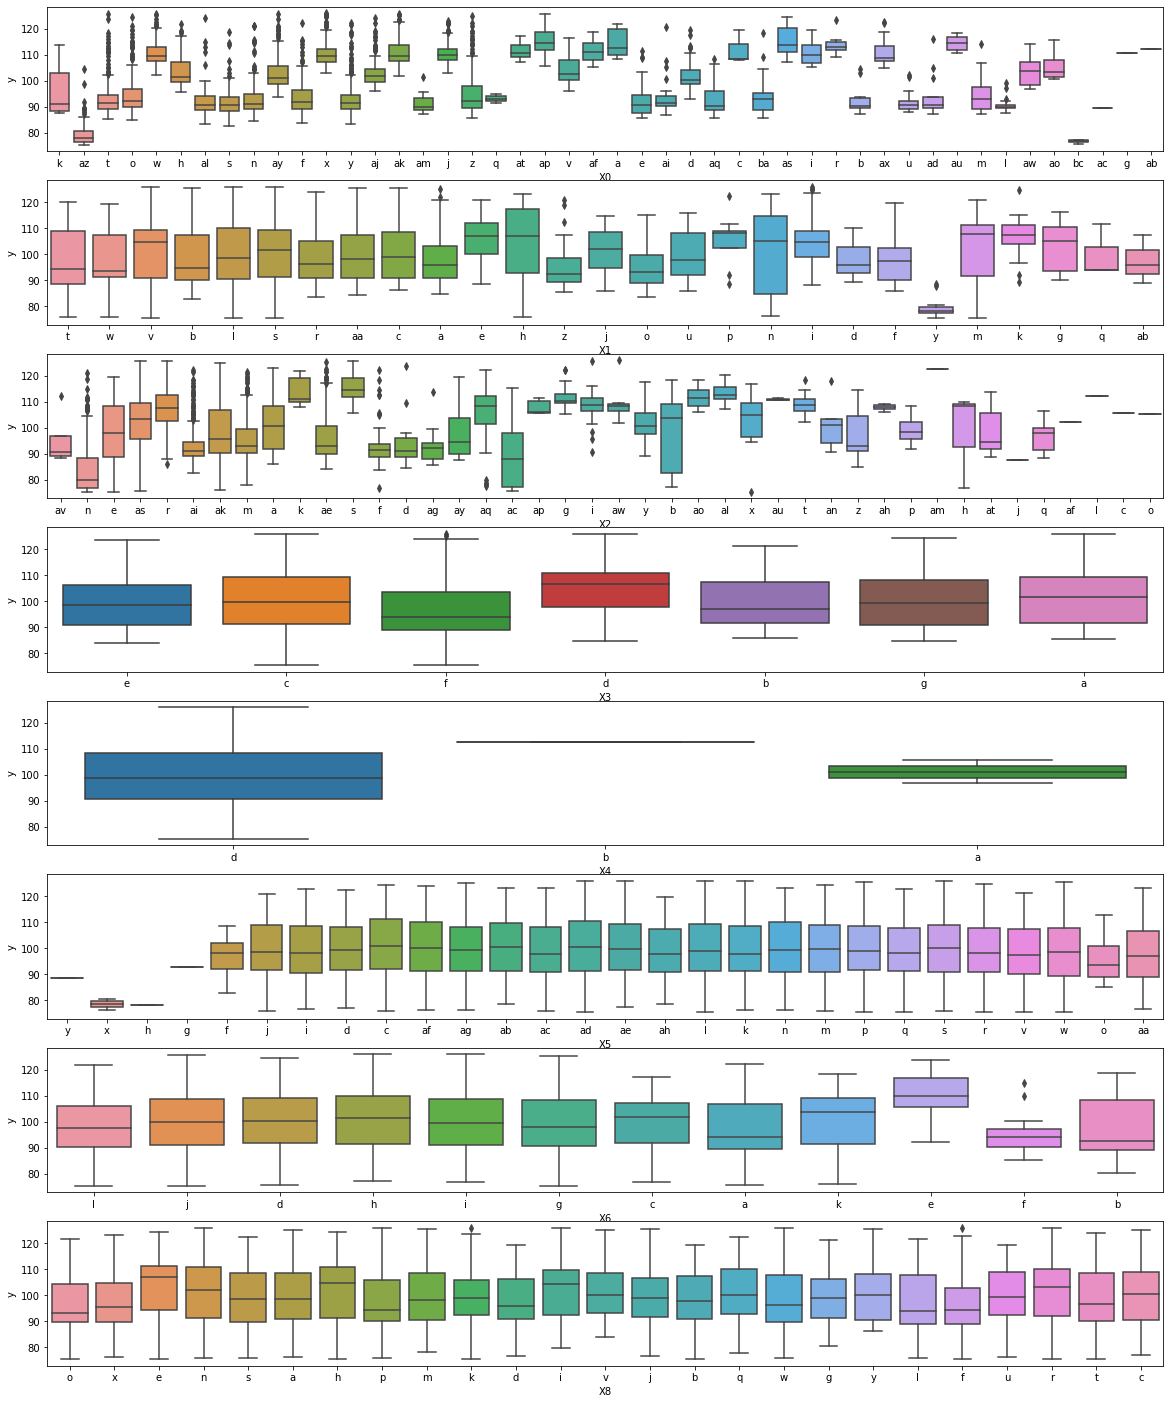

In [26]:
#label encoding
import seaborn as sns

fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(8,1,figsize = (20,25))
sns.boxplot(data = train_cleaned,x = 'X0', y = 'y',ax = ax1)
sns.boxplot(data = train_cleaned,x = 'X1', y = 'y',ax = ax2)
sns.boxplot(data = train_cleaned,x = 'X2', y = 'y',ax = ax3)
sns.boxplot(data = train_cleaned,x = 'X3', y = 'y',ax = ax4)
sns.boxplot(data = train_cleaned,x = 'X4', y = 'y',ax = ax5)
sns.boxplot(data = train_cleaned,x = 'X5', y = 'y',ax = ax6)
sns.boxplot(data = train_cleaned,x = 'X6', y = 'y',ax = ax7)
sns.boxplot(data = train_cleaned,x = 'X8', y = 'y',ax = ax8)

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Splitting the data by 80/20
x_train, x_valid, y_train, y_valid = train_test_split(pca_result_train, y_train, test_size = 0.2, random_state = 42)

In [30]:
f_train = xgb.DMatrix(x_train, label = y_train)
f_valid = xgb.DMatrix(x_valid, label = y_valid)
f_test = xgb.DMatrix(x_test)
f_test = xgb.DMatrix(pca_result_test)

In [31]:
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4


In [33]:
def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'valid')]

P = xgb.train(params, f_train, 1000, final_set, early_stopping_rounds=50, feval=scorer, maximize=True, verbose_eval=10)

[01:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.99697	train-r2:-59.49733	valid-rmse:98.88884	valid-r2:-61.82690
[10]	train-rmse:81.14408	train-r2:-39.64492	valid-rmse:81.07848	valid-r2:-41.23399
[20]	train-rmse:66.59753	train-r2:-26.37844	valid-rmse:66.55611	valid-r2:-27.45948
[30]	train-rmse:54.75784	train-r2:-17.50910	valid-rmse:54.73342	valid-r2:-18.24670
[40]	train-rmse:45.14008	train-r2:-11.57816	valid-rmse:45.13793	valid-r2:-12.08984
[50]	train-rmse:37.34669	train-r2:-7.60987	valid-rmse:37.35502	valid-r2:-7.96497
[60]	train-rmse:31.04961	train-r2:-4.95120	valid-rmse:31.08432	valid-r2:-5.20774
[70]	train-rmse:25.98398	train-r2:-3.16777	valid-rmse:26.03102	valid-r2:-3.35345
[80]	train-rmse:21.93872	train-r2:-1.97108	valid-rmse:21.99812	valid-r2:-2.10901
[90]	train-rmse:18.73534	train-r2:-1.16678	valid-rmse:18.81639	valid-r2:-1.27470
[100

In [34]:
p_test = P.predict(f_test)
p_test

array([ 79.19325 ,  95.80889 ,  81.3404  , ...,  98.530495, 107.18358 ,
        95.31658 ], dtype=float32)

In [35]:
Predicted_Data = pd.DataFrame()
Predicted_Data['y'] = p_test
Predicted_Data.head()


,y
0,79.193253
1,95.808891
2,81.340401
3,77.480652
4,109.729385
